% in left well for T=100K: 98.33%
% in right well for T=100K: 1.67%
% in left well for T=300K: 66.13%
% in right well for T=300K: 33.02%
% in left well for T=1000K: 31.41%
% in right well for T=1000K: 49.44%


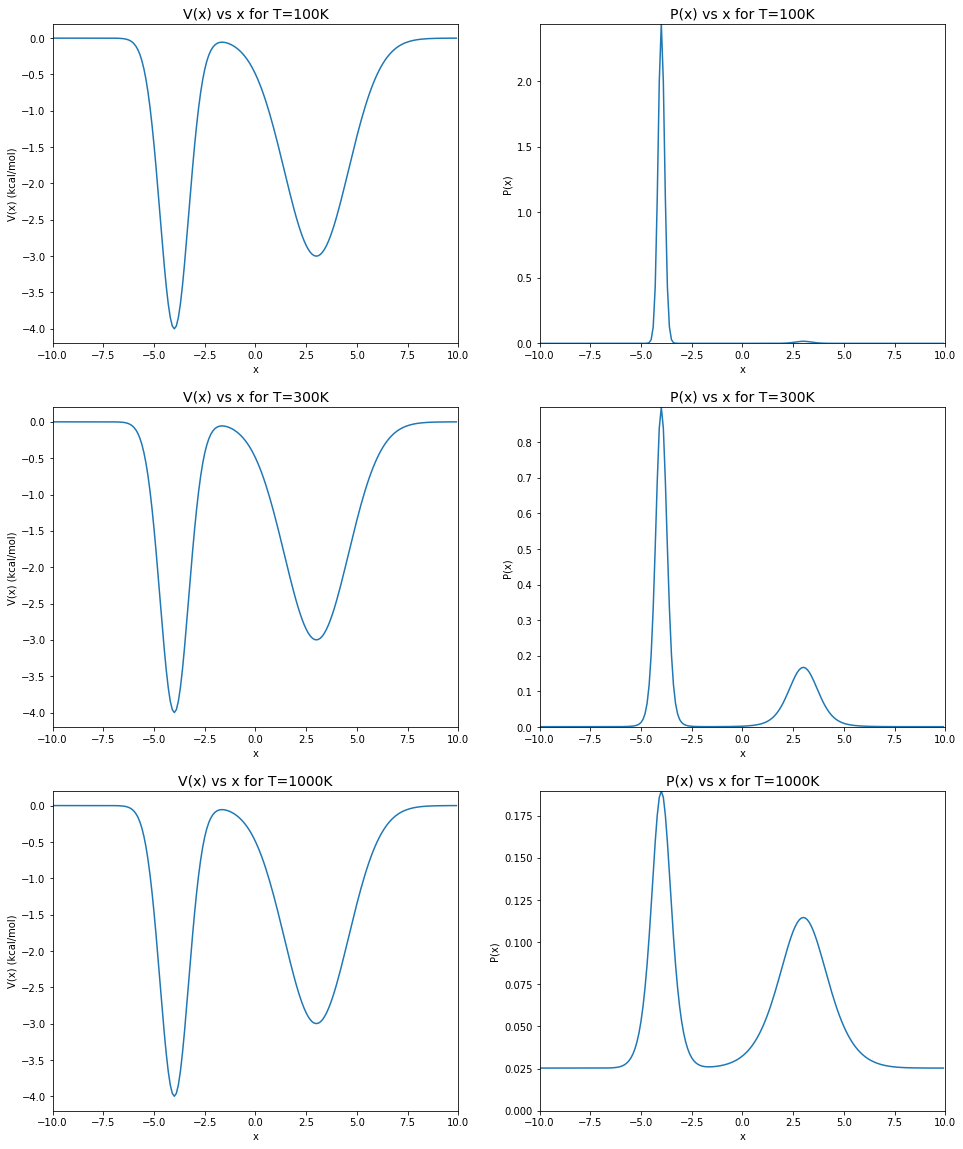

In [23]:
# Cyril Marinos
# CHM6461 HW4
# Due: 4/16/18
# Jupyter notebook, Python 3

# Problem 1

import time
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,20)

def V(x):
    return (-A)*(math.exp((-B)*((x+4)**2))) - (C*math.exp((-D)*((x-3)**2)))

def Pxnum(x,kbt):
    return math.exp(-1*(V(x))/kbt)

A = 4
B = 1
C = 3
D = 0.2

n = 0

R = .0019872036 # in kcal / molK
Tl = [100, 300, 1000] # in Kelvin

for T in Tl:
    Vx = []
    Px = []
    kbt = R*T
    
    denom = quad(Pxnum, -10, 10, args=(kbt))[0] 
    
    leftwell = quad(Pxnum, -6, -2, args=(kbt))[0] 
    rightwell = quad(Pxnum, -1, 7.5, args=(kbt))[0] 
    print("% in left well for T=" + str(T) + "K: " + str(round(leftwell/denom * 100,2)) + "%")
    print("% in right well for T=" + str(T) + "K: " + str(round(rightwell/denom * 100,2)) + "%")
    for x in np.arange(-10, 10, 0.1):
        Vx.append(V(x))
        Px.append(Pxnum(x,kbt)/denom)

    plt.subplot(3,2,n+1)
    plt.title("V(x) vs x for T=" + str(T) + "K", fontsize=14)
    plt.xlabel("x")
    plt.ylabel("V(x) (kcal/mol)")
    plt.xlim(-10,10)
    plt.plot(np.arange(-10, 10, 0.1),Vx,label="V(x)")

    plt.subplot(3,2,n+2)
    plt.title("P(x) vs x for T=" + str(T) + "K", fontsize=14)
    plt.xlabel("x")
    plt.ylabel("P(x)")
    plt.ylim(0,max(Px))
    plt.xlim(-10,10)
    plt.plot(np.arange(-10, 10, 0.1),Px,label="P(x)")
    n+=2
    

As the temperature increases, the width of the two wells increase, but the height and width of the right well increase much faster than the height and width of the left well, causing the percentage in that well to be greater than that of the left well by T=1000K.

% in left well for T=100K: 95.07%
% in right well for T=100K: 4.9%
Time taken: 9.93 seconds
% in left well for T=300K: 50.49%
% in right well for T=300K: 46.83%
Time taken: 7.2 seconds
% in left well for T=1000K: 24.1%
% in right well for T=1000K: 50.54%
Time taken: 5.85 seconds


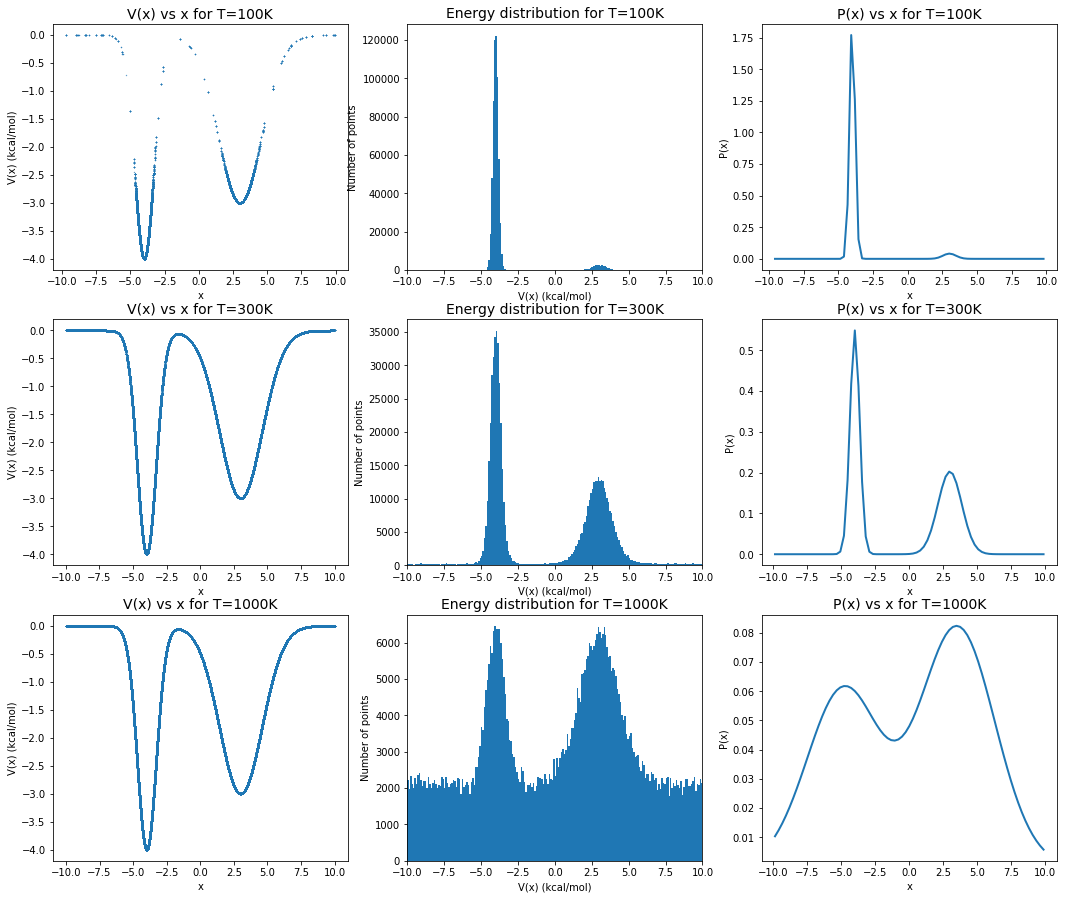

In [4]:
# Problem 2

import time
import math
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.interpolate import UnivariateSpline
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,48)
from scipy.stats.kde import gaussian_kde
from scipy.stats import norm
from pylab import *
from scipy.optimize import curve_fit

def Step(x,step):
    alpha = np.random.uniform(-1,1)
    dx = np.random.normal(3,3)
    if (x + alpha*dx > 10):
        return x + alpha*dx - 20
    elif (x + alpha*dx < -10):
        return x + alpha*dx + 20
    else:
        return x + alpha*dx
    
def V(x):
    return (-A)*(math.exp((-B)*((x+4)**2))) - (C*math.exp((-D)*((x-3)**2)))

def Prob(E,En,kbt):
    return math.exp(-(En - E)/kbt)

def Pxnum(x,kbt):
    return math.exp(-1*(V(x))/kbt)

def gauss(x,mu,sigma,A):
    return A*exp(-(x-mu)**2/2/sigma**2)

def bimodal(x,mu1,sigma1,A1,mu2,sigma2,A2):
    return gauss(x,mu1,sigma1,A1)+gauss(x,mu2,sigma2,A2)

A = 4
B = 1
C = 3
D = 0.2

n = 0                            # for indexing the graphs

Nmax = 700000                    # total number of accepted values

xrsl = np.random.uniform(-10,10,size=25)
R = .0019872036                  # in kcal / molK
Tl = [100, 300, 1000]            # list of temperatures in Kelvin
nleft = []
pleft = []
for T in Tl:
    to = time.clock() # Time 0
    l=0

    
    leftwelllist = []
    rightwelllist = []
    
    dist = []        # per random seed list of x values accepted
    Vx = []          # per random seed list of accepted energies
    distr = []       # for all random seeds list of x values accepted
    vxr = []         # for all random seeds list of accepted energies
    
    kbt = R*T
    
    for xrs in xrsl: 
        Eo = V(xrs)
        dist.append(xrs)
        Vx.append(Eo)
        #Px.append(math.exp(-1*Eo/kbt)/denom)
        x=xrs
        i=1
        
        while (len(dist) < Nmax/(len(xrsl))):
            E = V(x)
            xn = Step(x,i)
            En = V(xn)
            if(En < E):
                dist.append(xn)
                Vx.append(En)
                x = xn
                i+=1
                if (xn > -6 and xn < -2 and T==300 and l==0):
                    nleft.append(xn)
                    pleft.append(100*len(nleft)/len(dist))
            else:
                a = np.random.uniform(0,1)
                if (Prob(E,En,kbt) > a):
                    dist.append(xn)
                    Vx.append(En)
                    x = xn
                    i+=1
                    if (xn > -6 and xn < -2 and T==300 and l==0):
                        nleft.append(xn)
                        pleft.append(100*len(nleft)/len(dist))

        # 10% of data is dumped and the remainder is added to the end of distr and vxr lists, loops to next random seed
        del dist[:int(Nmax/(len(xrsl))/10)] 
        del Vx[:int(Nmax/(len(xrsl))/10)]
        distr.extend(dist)
        vxr.extend(Vx)
        l=1
    for xes in distr:
        if (xes > -6 and xes < -2):
            leftwelllist.append(xes)
        if (xes > -1 and xes < 7.5):
            rightwelllist.append(xes)
    plt.subplot(9,3,n+1)
    plt.title("V(x) vs x for T=" + str(T) + "K", fontsize=14)
    plt.xlabel("x")
    plt.ylabel("V(x) (kcal/mol)")
    plt.scatter(distr,vxr,label="V(x)", s=0.1)
    
    plt.subplot(9,3,n+2)
    plt.hist(distr,200)
    plt.xlim(-10,10)
    plt.title("Energy distribution for T=" + str(T) + "K", fontsize=14)
    plt.ylabel("Number of points")
    plt.xlabel("V(x) (kcal/mol)")
    
    plt.subplot(9,3,n+3)
    plt.title("P(x) vs x for T=" + str(T) + "K", fontsize=14)
    plt.xlabel("x")
    plt.ylabel("P(x)")
    #plt.scatter(distr,pxr,label="P(x)", s=0.1)
    y, x = np.histogram(distr, bins=75,normed=True) 
    x = x[:-1] + (x[1] - x[0])/2
    expected=(-4,.2,10000,2.5,.2, 10000)
    params,cov=curve_fit(bimodal,x,y, expected)
    sigma=sqrt(diag(cov))
    plot(x,bimodal(x,*params),lw=2)

    print("% in left well for T=" + str(T) + "K: " + str(round(100*len(leftwelllist)/len(distr),2)) + "%")
    print("% in right well for T=" + str(T) + "K: " + str(round(100*len(rightwelllist)/len(distr),2)) + "%")

    n+=3
    
    print("Time taken: " + str(round((time.clock() - to),2)) + " seconds") 

14331


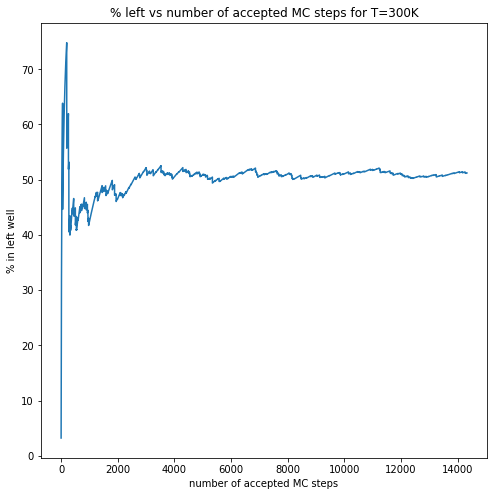

In [5]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8,8)
plt.title("% left vs number of accepted MC steps for T=300K")
plt.xlabel("number of accepted MC steps")
plt.ylabel("% in left well")
plt.plot(np.arange(0,len(pleft),1),pleft)
plt.plot()
print(len(pleft))

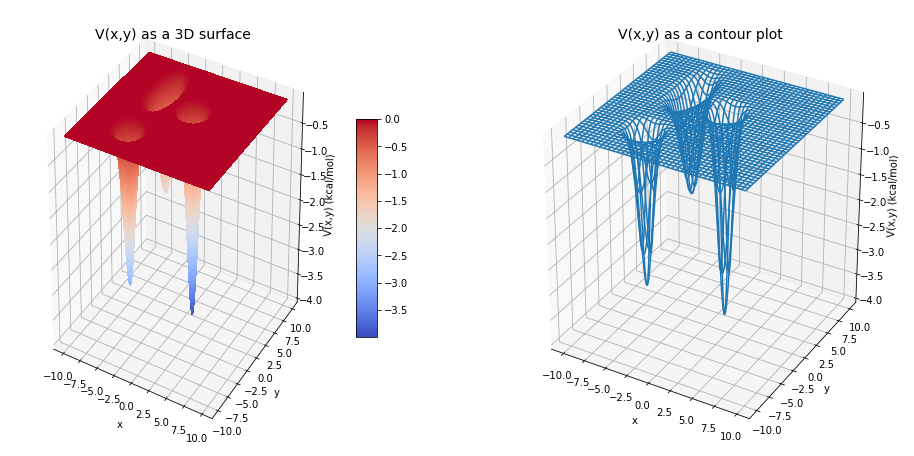

In [34]:
# Problem 3a

import time
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from scipy.integrate import quad
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,20)
fig = plt.figure(figsize=plt.figaspect(0.5))

def V(X,Y):
    return -1*(f1(X,Y) + f2(X,Y) + f3(X,Y))

def f1(X,Y):
    return 4*np.exp(-1*(((X-1)**2)+((Y-2)**2)))

def f2(X,Y):
    return 3*np.exp(-1*(((X+4)**2)+((Y+5)**2)))

def f3(X,Y):
    return 2*np.exp(-1*(((X+4)**2)+(0.2*(Y-4)**2)))

def Pxnum(x,kbt):
    return math.exp(-1*(V(x))/kbt)
 
# Plotting code from https://matplotlib.org/mpl_toolkits/mplot3d/tutorial.html
    
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
# make these grids less fine for faster computational time
X = np.arange(-10, 10, 0.05)
Y = np.arange(-10, 10, 0.05)
X, Y = np.meshgrid(X, Y)
Z = V(X,Y)
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm, linewidth=0, antialiased=False)
fig.colorbar(surf, shrink=0.5, aspect=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("V(x,y) (kcal/mol)")
plt.title("V(x,y) as a 3D surface", fontsize=14)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("V(x,y) (kcal/mol)")
plt.title("V(x,y) as a contour plot", fontsize=14)

plt.show()

In [5]:
# Problem 3b - Monte Carlo algorithm

import time
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from scipy.integrate import quad
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,32)
fig = plt.figure(figsize=plt.figaspect(1))

def Step(x):
    alpha = np.random.uniform(-1,1)
    dx = np.random.normal(1, 2)
    #dx = np.random.uniform(0.3,2.5)
    if (x + alpha*dx > 10):
        return x + alpha*dx - 20
    elif (x + alpha*dx < -10):
        return x + alpha*dx + 20
    else:
        return x + alpha*dx

def V(X,Y):
    return -1*(f1(X,Y) + f2(X,Y) + f3(X,Y))

def f1(X,Y):
    return 4*np.exp(-1*(((X-1)**2)+((Y-2)**2)))

def f2(X,Y):
    return 3*np.exp(-1*(((X+4)**2)+((Y+5)**2)))

def f3(X,Y):
    return 2*np.exp(-1*(((X+4)**2)+(0.2*(Y-4)**2)))

def Prob(E,En,kbt):
    return np.exp(-(En - E)/kbt)

def Pxnum(x,kbt):
    return np.exp(-1*(V(x,y))/kbt)

n = 0

R = .0019872036 # in kcal / molK
Tl = [100, 300, 1000] # in Kelvin

Vxy = []
Px = []
#denom = quad(Pxnum, -10, 10, args=(kbt))[0] 
#print(denom)
Nmax = 5000

yrsl = np.random.uniform(-10,10,size=10)
xrsl = np.random.uniform(-10,10,size=10)
vaxys = []
distaxs = []
distays = []

# plot a 3D surface like in the example mplot3d/surface3d_demo
for T in Tl:
    to = time.clock() # Time 0

    distx = []        # per random seed list of x values accepted
    disty = []
    Vxy = []          # per random seed list of accepted energies
    #Px = []          # per random seed list of probabilities for accepted energies
    distax = []       # for all random seeds list of x values accepted
    distay = []
    vaxy = []         # for all random seeds list of accepted energies
    #pxr = []         # for all random seeds list of probabilities for accepted energies
    
    kbt = R*T
    #denom = quad(Pxnum, -10, 10, args=(kbt))[0]
    
    for xrs in xrsl: 
        for yrs in yrsl:
            Eo = V(xrs,yrs)
            distx.append(xrs)
            disty.append(yrs)
            Vxy.append(Eo)
            #Px.append(math.exp(-1*Eo/kbt)/denom)
            x=xrs
            y=yrs
            while (len(disty) < Nmax/(len(xrsl))):
                E = V(x,y)
                xn = Step(x)
                yn = Step(y)
                En = V(xn,yn)
                if(En < E):
                    distx.append(xn)
                    disty.append(yn)
                    Vxy.append(En)
                    #Px.append(math.exp(-1*En/kbt)/denom)
                    x = xn
                    y = yn
                else:
                    a = np.random.uniform(0,1)
                    if (Prob(E,En,kbt) > a):
                        distx.append(xn)
                        disty.append(yn)
                        Vxy.append(En)
                        #Px.append(math.exp(-1*En/kbt)/denom)
                        x = xn
                        y = yn
        
            # 10% of data is dumped and the remainder is added to the end of distr and vxr lists, loops to next random seed
             
            del disty[:int(Nmax/(len(xrsl))/5)]
            distay.extend(disty)
            del Vxy[:int(Nmax/(len(xrsl))/5)]
            vaxy.extend(Vxy)
            del distx[:int(Nmax/(len(xrsl))/5)]
            distax.extend(distx)
        del Vxy[:int(Nmax/(len(xrsl))/5)]
        vaxy.extend(Vxy)
        del distx[:int(Nmax/(len(xrsl))/5)]
        distax.extend(distx)
        del disty[:int(Nmax/(len(xrsl))/5)]
        distay.extend(disty)
    vaxys.append(vaxy)
    distaxs.append(distax)
    distays.append(distay)
    print("Time taken for T=" + str(T) + "K: " + str(round((time.clock() - to),2)) + " seconds") 

print("Finished.")

Time taken for T=100K: 1.72 seconds
Time taken for T=300K: 0.5 seconds
Time taken for T=1000K: 0.31 seconds
Finished.


Time taken for T=100K: 53.89 seconds
Time taken for T=300K: 62.05 seconds
Time taken for T=1000K: 55.23 seconds


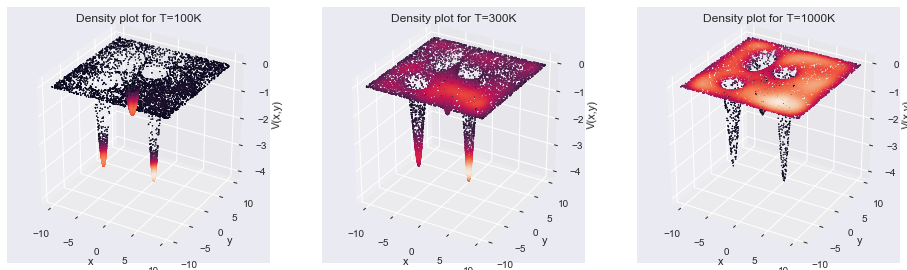

In [6]:
# Problem 3b - 3D Density Plot (takes a while)

import time
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from scipy.integrate import quad
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,32)
fig = plt.figure(figsize=plt.figaspect(1))

n=0
i = 0
for T in Tl:
    vaxy = vaxys[i]
    distax = distaxs[i]
    distay = distays[i]
    i+=1
    to = time.clock() # Time 0

    x = np.array(distax)
    y = np.array(distay)
    z = np.array(vaxy)
    xyz = np.vstack([x,y,z])
    density = stats.gaussian_kde(xyz)(xyz) 

    idx = density.argsort()
    x, y, z, density = x[idx], y[idx], z[idx], density[idx]
    ax = fig.add_subplot(3, 3, n+1, projection='3d')
    ax.set_title("Density plot for T=" + str(T) + "K")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("V(x,y)")
    ax.scatter(x, y, z, c=density,s=1)
    #n+=1
    #fig = plt.figure()
    

    n+=1
    print("Time taken for T=" + str(T) + "K: " + str(round((time.clock() - to),2)) + " seconds") 

    #plt.show()
    #fig = plt.figure()

Time taken for T=100K: 8.34 seconds
Time taken for T=300K: 8.3 seconds
Time taken for T=1000K: 8.31 seconds


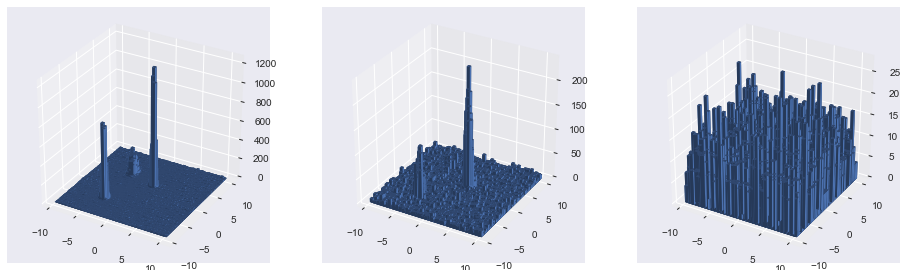

In [7]:
# Problem 3b - 3D Histogram

import time
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from scipy.integrate import quad
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,32)
fig = plt.figure(figsize=plt.figaspect(1))

n=0
i = 0
for T in Tl:
    vaxy = vaxys[i]
    distax = distaxs[i]
    distay = distays[i]
    i+=1
    to = time.clock() # Time 0

    x = np.array(distax)
    y = np.array(distay)
    z = np.array(vaxy)

    ax = fig.add_subplot(3, 3, n+1, projection='3d')
    #x, y = np.random.rand(2, 100) * 4
    hist, xedges, yedges = np.histogram2d(x, y, bins=100, range=([-10,10],[-10,10]))

# Construct arrays for the anchor positions of the 16 bars.
# Note: np.meshgrid gives arrays in (ny, nx) so we use 'F' to flatten xpos,
# ypos in column-major order. For numpy >= 1.7, we could instead call meshgrid
# with indexing='ij'.
    xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
    xpos = xpos.flatten('F')
    ypos = ypos.flatten('F')
    zpos = np.zeros_like(xpos)

# Construct arrays with the dimensions for the 16 bars.
    dx = 0.5 * np.ones_like(zpos)
    dy = dx.copy()
    dz = hist.flatten()

    ax.bar3d(xpos, ypos, zpos, dx, dy, dz, color='b', zsort='average')
    n+=1
    print("Time taken for T=" + str(T) + "K: " + str(round((time.clock() - to),2)) + " seconds") 

    #plt.show()
    #fig = plt.figure()

Time taken for T=100K: 16.43 seconds
Time taken for T=300K: 16.27 seconds
Time taken for T=1000K: 15.98 seconds


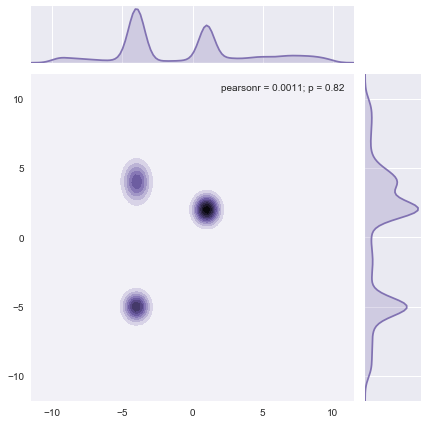

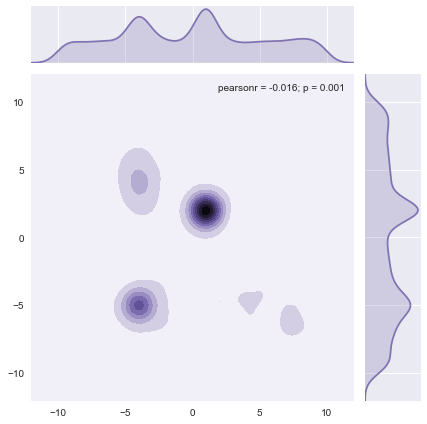

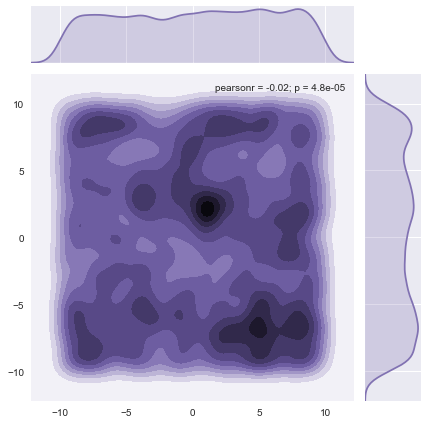

In [35]:
# Problem 3b - 3D Histogram

import time
import math
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.axes3d import Axes3D, get_test_data
from matplotlib import cm
from scipy.integrate import quad
import pandas as pd
from scipy import stats, integrate
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline
plt.rcParams['figure.figsize'] = (16,32)
fig = plt.figure(figsize=plt.figaspect(1))

n=0
i = 0
for T in Tl:
    vaxy = vaxys[i]
    distax = distaxs[i]
    distay = distays[i]
    i+=1
    to = time.clock() # Time 0

    x = np.array(distax)
    y = np.array(distay)
    z = np.array(vaxy)

    #plt.subplot(6,6,n+1)
    #x, y = np.random.rand(2, 100) * 4
    
    sns.jointplot(x, y, kind="kde", color="m")
    #n+=2
    print("Time taken for T=" + str(T) + "K: " + str(round((time.clock() - to),2)) + " seconds") 

    #plt.show()
    #fig = plt.figure()

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>